# Testing Fourier 2D integration using dummy data

In [1]:
import pixstem.api as ps
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def fourier(image):
    ft = np.fft.ifftshift(image)
    ft = np.fft.fft2(ft)
    ft = np.fft.fftshift(ft)
    
    freq_x = np.fft.fftfreq(ft.shape[0])
    freq_y = np.fft.fftfreq(ft.shape[1])
    freq_x = np.fft.fftshift(freq_x)
    freq_y = np.fft.fftshift(freq_y)

    # plt.imshow(np.abs(ft), extent=(freq_x.min(),freq_x.max(),freq_y.min(),freq_y.max()))
    # plt.colorbar()
    # plt.xlabel('k')
    # plt.ylabel('l')
    # plt.show()
               
    return ft, (freq_x, freq_y)


def inv_fourier(ft):
    ift = np.fft.ifftshift(ft)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)

    return ift


def test_fourier_integration(dpc_lr, dpc_ud):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    mp = axs[0].imshow(dpc_lr, cmap='gray')
    axs[0].set_title('Left-right phase gradient')
    plt.colorbar(mp, ax=axs[0])
    mp = axs[1].imshow(dpc_ud, cmap='gray')
    axs[1].set_title('Up-down phase gradient')
    plt.colorbar(mp, ax=axs[1])
    plt.tight_layout()
    plt.show()

    # fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    # mp = axs[0].imshow(np.cumsum(dpc_lr, axis=1))
    # plt.colorbar(mp, ax=axs[0])
    # mp = axs[1].imshow(np.cumsum(dpc_ud, axis=0))
    # plt.colorbar(mp, ax=axs[1])
    # plt.tight_layout()
    # plt.show()

    phi_x = dpc_lr
    phi_y = dpc_ud

    g = phi_x + (1j * phi_y)
    plt.imshow(np.abs(g))
    plt.title('| g(x,y) |')
    plt.colorbar()
    plt.show()

    ft_g, (freq_x, freq_y) = fourier(g)

    freq_xx, freq_yy = np.meshgrid(freq_x, freq_y, indexing='ij')
    denom = ((2. * np.pi * 1.0j) * (freq_xx + (1.0j * freq_yy))) + 1e-16

    phi = inv_fourier(ft_g / denom)
    fig, ax = plt.subplots(1, 1)
    # mp = axs[0].imshow(np.real(phi))
    # plt.colorbar(mp, ax=axs[0])
    # axs[0].set_title(r'$\Re{(\Phi)}$')
    # mp = axs[1].imshow(np.imag(phi))
    # plt.colorbar(mp, ax=axs[1])
    # axs[1].set_title(r'$\Im{(\Phi)}$')
    mp = ax.imshow(np.abs(phi))
    plt.colorbar(mp, ax=ax)
    ax.set_title(r'$|\Phi|}$')
    plt.tight_layout()
    plt.show()

## Our own synthetic data

In [3]:
def gen_phantom_slice(r_1=8, r_2=4, side_len=64, cx_1=31, cx_2=33, cy_1=31, cy_2=31, val_1=3, val_2=6, plot=False):
    # https://stackoverflow.com/a/49330324

    x = np.arange(0, side_len)
    y = np.arange(0, side_len)
    arr = np.zeros((y.size, x.size))

    arr[(x[np.newaxis,:]-cx_1)**2 + (y[:,np.newaxis]-cy_1)**2 < r_1**2] = val_1
    arr[(x[np.newaxis,:]-cx_2)**2 + (y[:,np.newaxis]-cy_2)**2 < r_2**2] = val_2

    proj = np.sum(arr, axis=0)

    if plot:
        fig, axs = plt.subplots(2, 1, sharex=True, figsize=(3, 6))
        mp = axs[0].imshow(arr)
        plt.colorbar(mp, ax=axs[0], location="top")
        axs[1].plot(proj)
        plt.tight_layout()
        plt.show()

    return arr

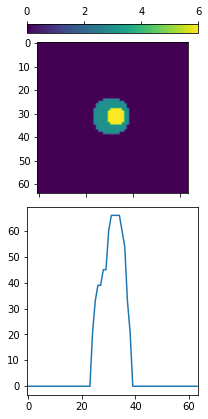

In [4]:
_ = gen_phantom_slice(plot=True)

In [5]:
phantom = np.zeros((50, 64, 64))
for i in range(15):
    phantom[::-1][i] = gen_phantom_slice(r_1=8+float(i)/5, r_2=2+float(i)/5, val_1=2, val_2=4)
for i in range(15, 50):
    phantom[::-1][i] = gen_phantom_slice(r_1=8+float(i)/5, r_2=2+float(i)/5)
    
noise = np.random.normal(scale=0.3, size=(50, 64, 64))
phantom += noise

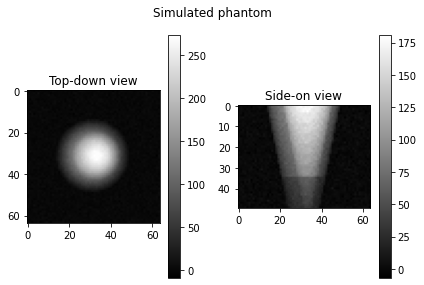

In [6]:
fix, axs = plt.subplots(1, 2)
mp = axs[0].imshow(np.sum(phantom, axis=0), cmap='gray')
plt.colorbar(mp, ax=axs[0])
axs[0].set_title('Top-down view')
projection = np.sum(phantom, axis=1)
mp = axs[1].imshow(projection, cmap='gray')
plt.colorbar(mp, ax=axs[1])
axs[1].set_title('Side-on view')
plt.suptitle('Simulated phantom')
plt.tight_layout()
plt.show()

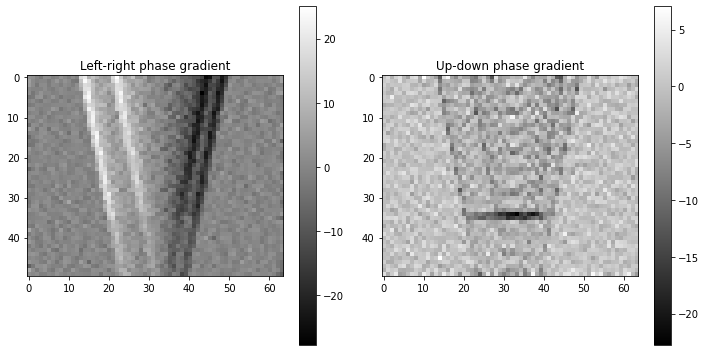

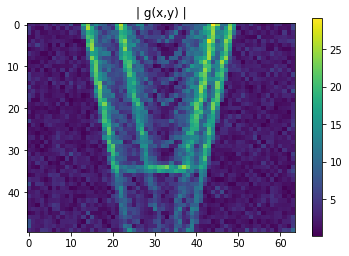

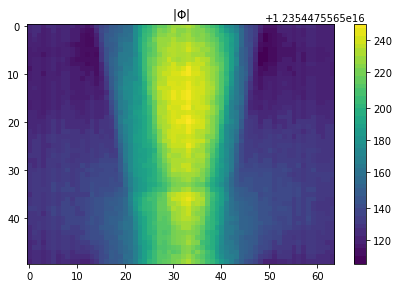

In [7]:
dpc_lr = np.gradient(projection, axis=1)
dpc_ud = np.gradient(projection, axis=0)
test_fourier_integration(dpc_lr, dpc_ud)

## `Pixstem`

In [8]:
# s = ps.dummy_data.get_simple_dpc_signal()
# test_fourier_integration(s.data[1], s.data[0])

In [9]:
# s = ps.dummy_data.get_stripe_pattern_dpc_signal()
# test_fourier_integration(s.data[1], s.data[0])

In [10]:
# s = ps.dummy_data.get_square_dpc_signal()
# test_fourier_integration(s.data[1], s.data[0])

In [11]:
# s = ps.dummy_data.get_square_dpc_signal(add_ramp=True)
# test_fourier_integration(s.data[1], s.data[0])